### (1). Defining a training, validation and testing data generators

In [1]:
from keras.preprocessing.image import ImageDataGenerator

train_directory = "../data/cats and dogs classification data/train/"
validation_directory = "../data/cats and dogs classification data/validation/"
test_directory = "../data/cats and dogs classification data/test/"

train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                       train_directory,
                       target_size=(150,150),
                       batch_size=20,
                       class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
                       validation_directory,
                       target_size=(150,150),
                       batch_size=20,
                       class_mode='binary')

test_generator = test_datagen.flow_from_directory(
                       test_directory,
                       target_size=(150,150),
                       batch_size=20,
                       class_mode='binary')

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### (2). Build a Convolution Neural Network

In [2]:
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras import models

model = models.Sequential()
# First Convolution layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
# Max pooling
model.add(MaxPooling2D((2, 2)))

# Second Convolution layer
model.add(Conv2D(64, (3,3), activation='relu'))
# Normalization
model.add(BatchNormalization())
# Max pooling
model.add(MaxPooling2D((2, 2)))

# Third Convolution layer
model.add(Conv2D(128, (3,3), activation='relu'))
# Max pooling
model.add(MaxPooling2D((2, 2)))

# Fourth Convolution layer
model.add(Conv2D(128, (3,3), activation='relu'))
# Normalization
model.add(BatchNormalization())
# Max pooling
model.add(MaxPooling2D((2, 2)))

# Perform flattening
model.add(Flatten())

# Dropout layer
model.add(Dropout(0.5))

# First Fully Connected layer
model.add(Dense(512, activation='relu'))

# Second Fully Connected layer/ Output layer
model.add(Dense(1, activation='sigmoid'))

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0

In [3]:
# Compile the network
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=0.0001), metrics=['acc'])

In [4]:
# Train the model
history = model.fit(train_generator, steps_per_epoch=120, epochs=10,
                   validation_data=validation_generator, validation_steps=30)

Epoch 1/10
120/120 [==============================] - 76s 629ms/step - loss: 0.9534 - acc: 0.5938 - val_loss: 0.7308 - val_acc: 0.5000
Epoch 2/10
120/120 [==============================] - 64s 537ms/step - loss: 0.6791 - acc: 0.6954 - val_loss: 0.8263 - val_acc: 0.5067
Epoch 3/10
120/120 [==============================] - 64s 534ms/step - loss: 0.5387 - acc: 0.7500 - val_loss: 0.8209 - val_acc: 0.5783
Epoch 4/10
120/120 [==============================] - 65s 541ms/step - loss: 0.4538 - acc: 0.7921 - val_loss: 0.6297 - val_acc: 0.6833
Epoch 5/10
120/120 [==============================] - 64s 531ms/step - loss: 0.3779 - acc: 0.8329 - val_loss: 0.6648 - val_acc: 0.6967
Epoch 6/10
120/120 [==============================] - 65s 540ms/step - loss: 0.3241 - acc: 0.8621 - val_loss: 0.6378 - val_acc: 0.6950
Epoch 7/10
120/120 [==============================] - 65s 538ms/step - loss: 0.2793 - acc: 0.8817 - val_loss: 0.6483 - val_acc: 0.7083
Epoch 8/10
120/120 [==============================] - 6

#### Plot the training and validation loss as a function of epochs. Plot the training and validation accuracy as a function of epochs

In [5]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

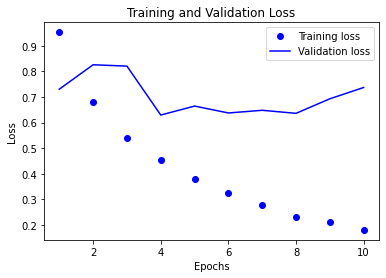

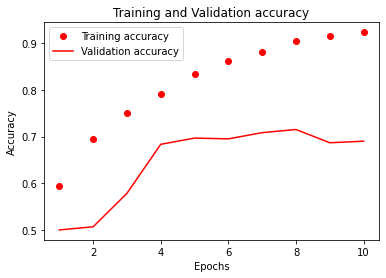

In [6]:
train_acc = history_dict['acc']
val_acc = history_dict['val_acc']
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(train_acc)+1)

# Plot loss plot 
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy plot 
plt.plot(epochs, train_acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### (3). Evaluating the performance on test data

In [7]:
import warnings
warnings.filterwarnings("ignore")
test_loss,test_acc = model.evaluate(test_generator)

print("Test loss for best validation model : ",test_loss)
print("Test accuracy for best validation model : ",test_acc)

50/50 [==============================] - 13s 260ms/step - loss: 0.7590 - acc: 0.7050
Test loss for best validation model :  0.7589651942253113
Test accuracy for best validation model :  0.7049999833106995


### (4). Visualize the activations of some of the convolution layers

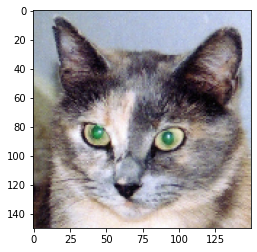

(1, 150, 150, 3)


In [8]:
# Loading a test image
from keras.preprocessing import image
import numpy as np
%matplotlib inline

img_path = '../data/cats and dogs classification data/test/cats/200.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [9]:
layer_outputs = [layer.output for layer in model.layers[:10]] # Extracts the outputs of the top 10 layers
# Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 

In [10]:
# Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor) 

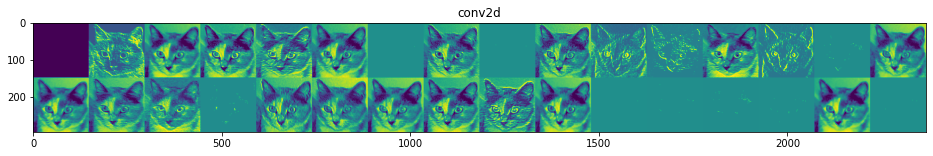

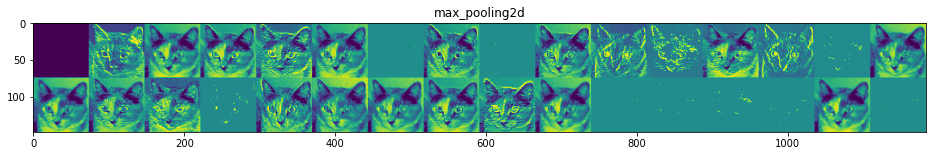

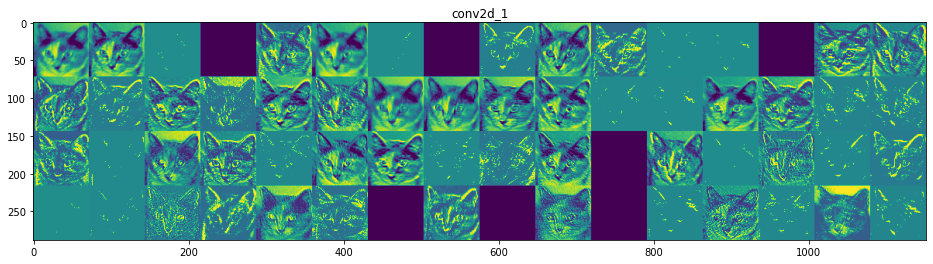

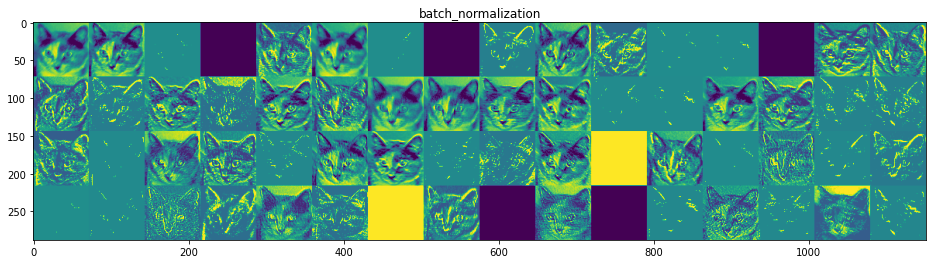

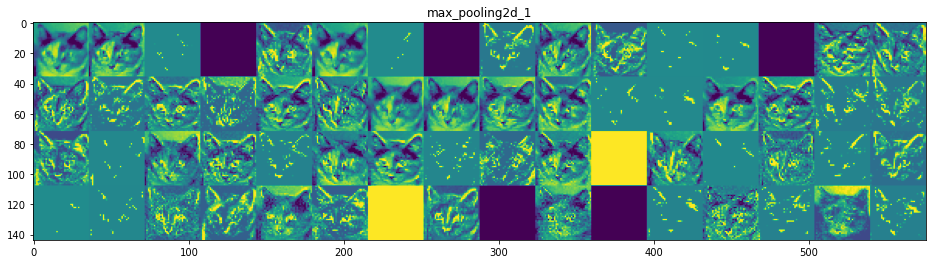

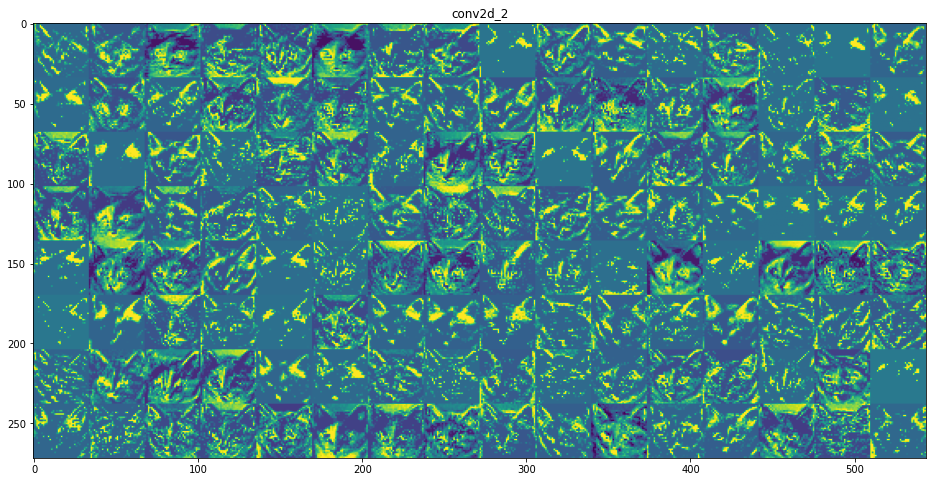

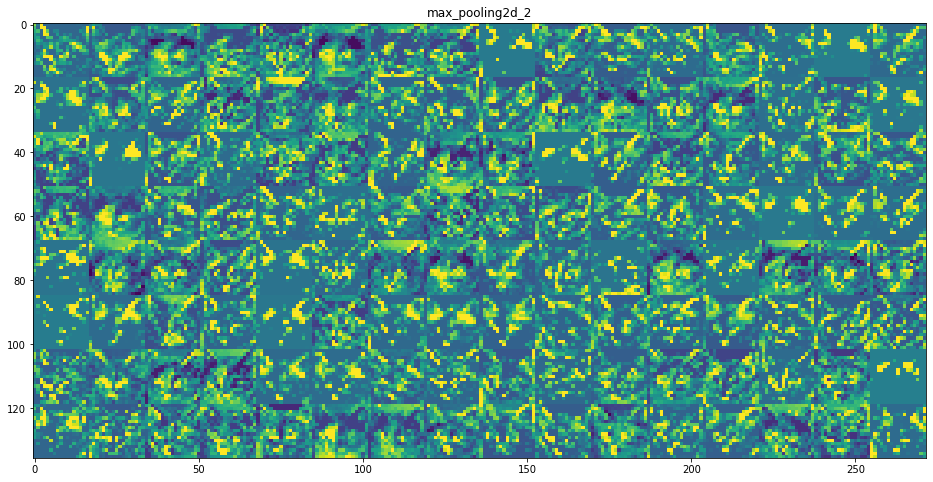

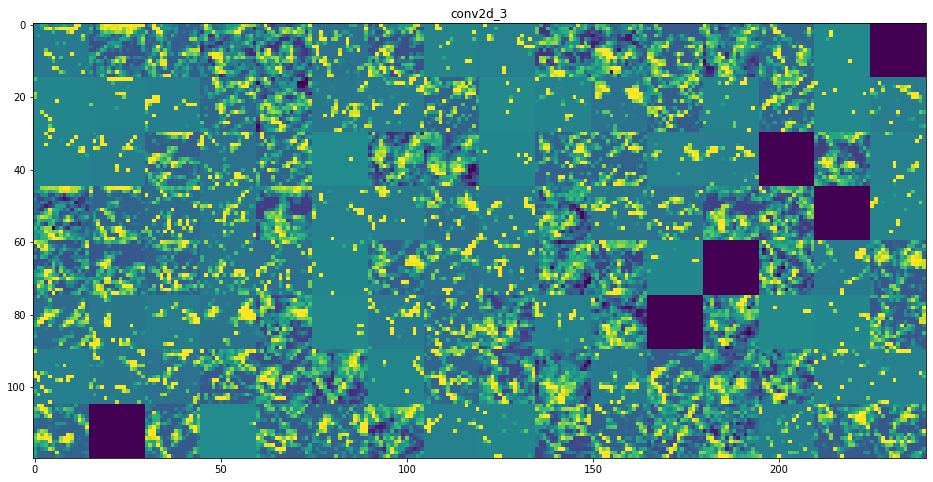

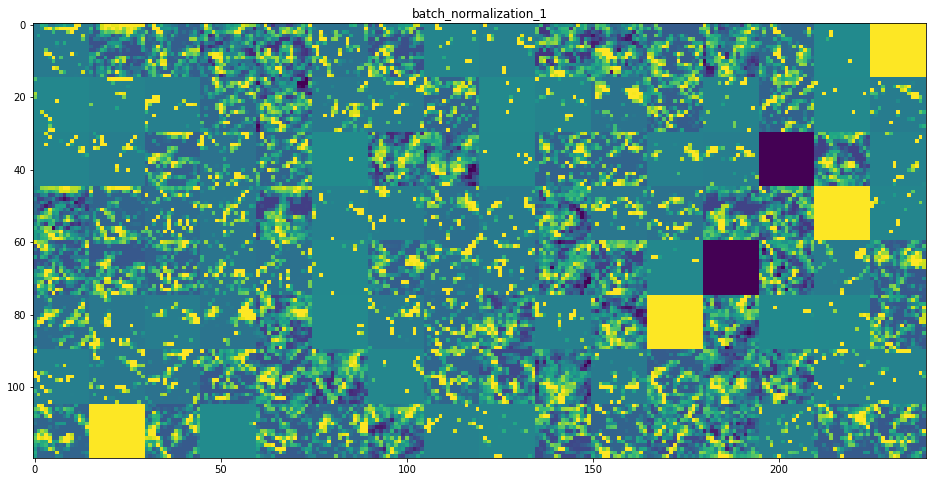

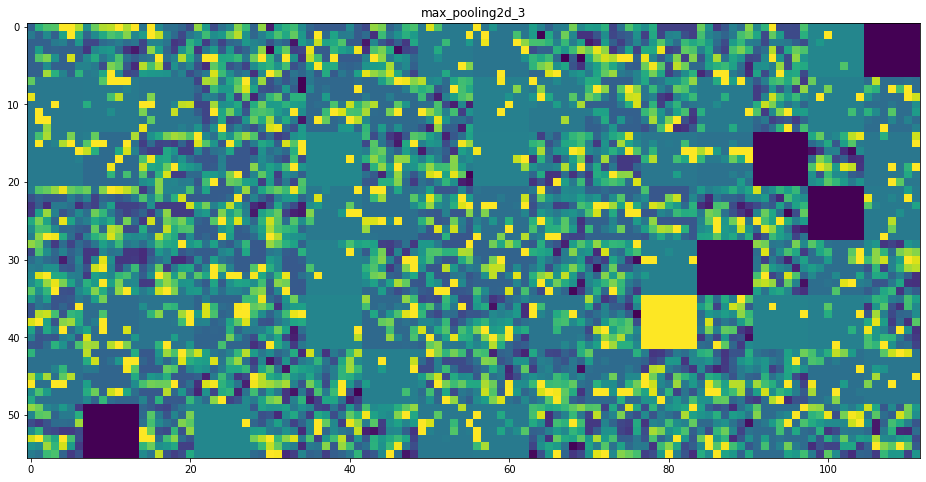

In [11]:
layer_names = []
for layer in model.layers[:10]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

#### Conclusion :- We can see full shape of cat in first and second convolution layer. There are several filters that are not activated and are left blank in 1st and 2nd convolution layer. In these layers, the activations retain almost all of the information present in the initial picture. But, as we go deeper in the layers, the activations become increasingly abstract and less visually interpretable. They begin to encode higher-level concepts such as lines, borders, corners etc. Higher presentations carry increasingly less information about the visual contents of the image, and increasingly more information related to the class of the image.

### (5). Visualize the filters learned in training by finding the input that will maximize their response

In [12]:
import tensorflow as tf

# The dimensions of our input image
img_width = 150
img_height = 150

# Our target layer: we will visualize the filters from this layer.
layer_name = "conv2d"

# Set up a model that returns the activation values for our target layer
layer = model.get_layer(name=layer_name)
feature_extractor = models.Model(inputs=model.inputs, outputs=layer.output)

# Set up the gradient ascent process
def compute_loss(input_image, filter_index):
    activation = feature_extractor(input_image)
    # We avoid border artifacts by only involving non-border pixels in the loss.
    filter_activation = activation[:, 2:-2, 2:-2, filter_index]
    return tf.reduce_mean(filter_activation)

@tf.function
def gradient_ascent_step(img, filter_index, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(img)
        loss = compute_loss(img, filter_index)
    # Compute gradients.
    grads = tape.gradient(loss, img)
    # Normalize gradients.
    grads = tf.math.l2_normalize(grads)
    img += learning_rate * grads
    return loss, img

In [13]:
def visualize_filter(filter_index, input_img):
    # We run gradient ascent for 20 steps
    iterations = 30
    learning_rate = 10.0
    img = input_img
    for iteration in range(iterations):
        loss, img = gradient_ascent_step(img, filter_index, learning_rate)

    # Decode the resulting input image
    img = deprocess_image(img[0].numpy())
    return loss, img

def deprocess_image(img):
    # Normalize array: center on 0., ensure variance is 0.15
    img -= img.mean()
    img /= img.std() + 1e-5
    img *= 0.15

    # Center crop
    img = img[25:-25, 25:-25, :]

    # Clip to [0, 1]
    img += 0.5
    img = np.clip(img, 0, 1)

    # Convert to RGB array
    img *= 255
    img = np.clip(img, 0, 255).astype("uint8")
    return img

Populating the interactive namespace from numpy and matplotlib


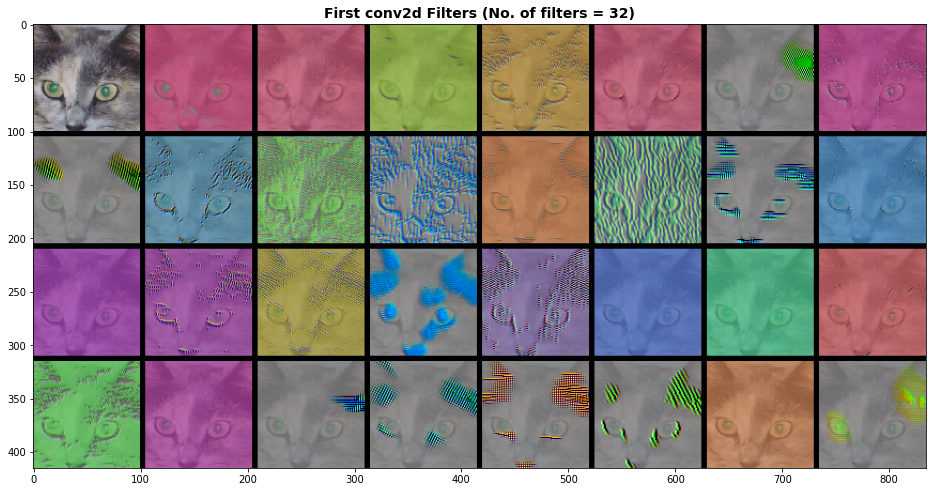

In [14]:
from tensorflow import keras
# Compute image inputs that maximize per-filter activations for the first 32 filters of our target layer
all_imgs = []
for filter_index in range(32):
    loss, img = visualize_filter(filter_index, img_tensor)
    all_imgs.append(img)

# Build a black picture with enough space for our 4 x 8 filters of size 128 x 128, with a 5px margin in between
margin = 5
n_height = 8
n_width = 4
cropped_width = img_width - 25 * 2
cropped_height = img_height - 25 * 2
width = n_width * cropped_width + (n_width - 1) * margin
height = n_height * cropped_height + (n_height - 1) * margin
stitched_filters = np.zeros((width, height, 3))

# Fill the picture with our saved filters
for i in range(n_width):
    for j in range(n_height):
        img = all_imgs[i * n_height + j]
        stitched_filters[
            (cropped_width + margin) * i : (cropped_width + margin) * i + cropped_width,
            (cropped_height + margin) * j : (cropped_height + margin) * j+ cropped_height,
            :
        ] = img
keras.preprocessing.image.save_img("stiched_filters.png", stitched_filters)

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(16,10))
img = mpimg.imread("stiched_filters.png")
plt.title("First "+layer_name+" Filters (No. of filters = 32)", fontsize = 14, fontweight ='bold')
plt.imshow(img)
plt.show()

In [15]:
# Our target layer: we will visualize the filters from this layer.
layer_name = "conv2d_1"

# Set up a model that returns the activation values for our target layer
layer = model.get_layer(name=layer_name)
feature_extractor = models.Model(inputs=model.inputs, outputs=layer.output)

Populating the interactive namespace from numpy and matplotlib


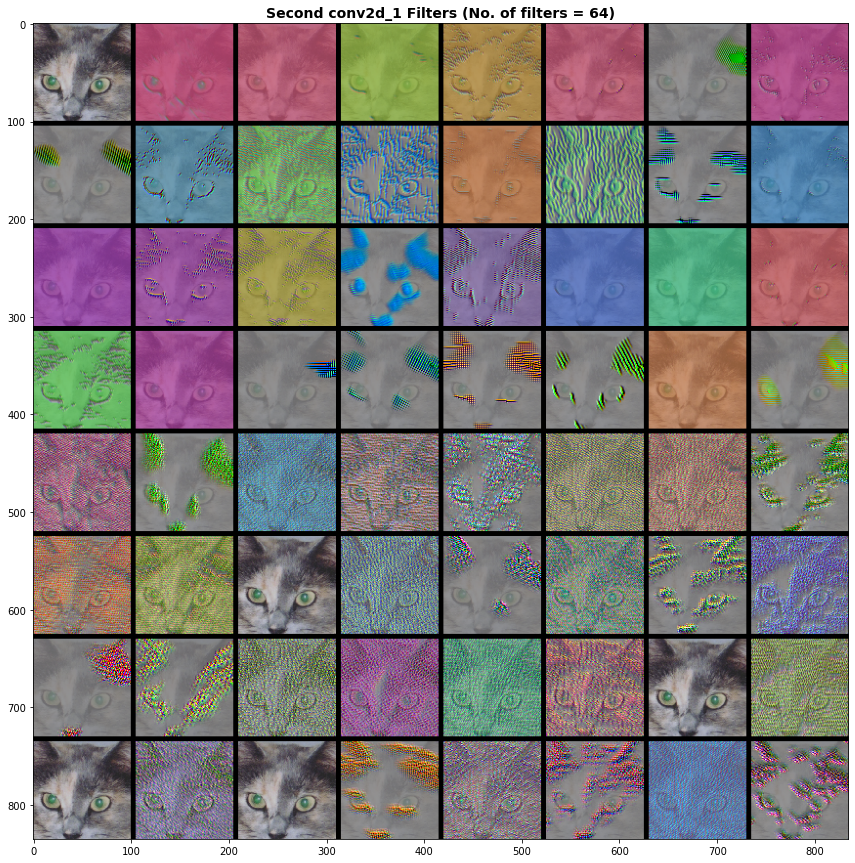

In [16]:
from tensorflow import keras
# Compute image inputs that maximize per-filter activations for the first 64 filters of our target layer
all_imgs = []
for filter_index in range(64):
    loss, img = visualize_filter(filter_index, img_tensor)
    all_imgs.append(img)

# Build a black picture with enough space for our 8 x 8 filters of size 128 x 128, with a 5px margin in between
margin = 5
n = 8
n = 8
cropped_width = img_width - 25 * 2
cropped_height = img_height - 25 * 2
width = n * cropped_width + (n - 1) * margin
height = n * cropped_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

# Fill the picture with our saved filters
for i in range(n):
    for j in range(n):
        img = all_imgs[i * n + j]
        stitched_filters[
            (cropped_width + margin) * i : (cropped_width + margin) * i + cropped_width,
            (cropped_height + margin) * j : (cropped_height + margin) * j+ cropped_height,
            :
        ] = img
keras.preprocessing.image.save_img("stiched_filters1.png", stitched_filters)

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(15,15))
img = mpimg.imread("stiched_filters1.png")
plt.title("Second "+layer_name+" Filters (No. of filters = 64)", fontsize = 14, fontweight ='bold')
plt.imshow(img)
plt.show()

#### Conclusion :- Here we can clearly see that different filters has different colors, shapes and textures much similar to the input image.

### (6). Replace our convolution layers with the pre-trained convolution base of VGG16. Train with the convolution base frozen and evaluate the results

In [17]:
from keras.applications import VGG16
conv_base = VGG16(
             weights='imagenet', include_top=False, input_shape=(150,150,3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [20]:
conv_base.trainable = False

model = models.Sequential()

# Adding pre-trained layers of VGG16
model.add(conv_base)

# Perform flattening
model.add(Flatten())

# Dropout layer
model.add(Dropout(0.5))

# First Fully Connected layer
model.add(Dense(256, activation='relu'))

# Second Fully Connected layer/ Output layer
model.add(Dense(1, activation='sigmoid'))

# Model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [21]:
# Compile the network
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=0.00001), metrics=['acc'])

# Train the model
history = model.fit(train_generator, steps_per_epoch=120, epochs=10,
                   validation_data=validation_generator, validation_steps=30)

Epoch 1/10
120/120 [==============================] - 310s 3s/step - loss: 0.6446 - acc: 0.6258 - val_loss: 0.5367 - val_acc: 0.7767
Epoch 2/10
120/120 [==============================] - 312s 3s/step - loss: 0.5218 - acc: 0.7454 - val_loss: 0.4587 - val_acc: 0.8283
Epoch 3/10
120/120 [==============================] - 315s 3s/step - loss: 0.4512 - acc: 0.8025 - val_loss: 0.4117 - val_acc: 0.8567
Epoch 4/10
120/120 [==============================] - 313s 3s/step - loss: 0.4056 - acc: 0.8304 - val_loss: 0.3741 - val_acc: 0.8567
Epoch 5/10
120/120 [==============================] - 316s 3s/step - loss: 0.3747 - acc: 0.8367 - val_loss: 0.3513 - val_acc: 0.8700
Epoch 6/10
120/120 [==============================] - 314s 3s/step - loss: 0.3453 - acc: 0.8542 - val_loss: 0.3332 - val_acc: 0.8767
Epoch 7/10
120/120 [==============================] - 312s 3s/step - loss: 0.3259 - acc: 0.8650 - val_loss: 0.3169 - val_acc: 0.8833
Epoch 8/10
120/120 [==============================] - 312s 3s/step - 

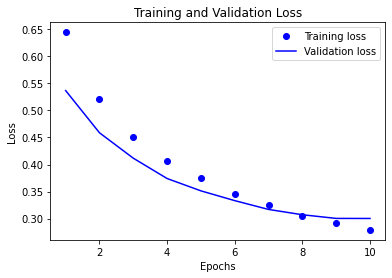

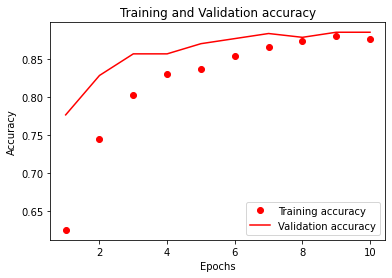

In [22]:
history_dict = history.history
history_dict.keys()

train_acc = history_dict['acc']
val_acc = history_dict['val_acc']
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(train_acc)+1)

# Plot loss plot 
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy plot 
plt.plot(epochs, train_acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
# Evaluating the model on test data
test_loss,test_acc = model.evaluate(test_generator)

print("Test loss for best validation model : ",test_loss)
print("Test accuracy for best validation model : ",test_acc)

50/50 [==============================] - 102s 2s/step - loss: 0.2998 - acc: 0.8610
Test loss for best validation model :  0.2997560501098633
Test accuracy for best validation model :  0.8610000014305115


### (7). Once the previous step is complete fine tune the convolution base: unfreeze the convolution base and continue to train. Evaluate the results you get and draw a conclusion.

In [24]:
# Unfreeze the conv_base
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if(layer.name == 'block5_conv1'):
        set_trainable = True
    if(set_trainable):
        layer.trainable = True
    else:
        layer.trainable = False

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [26]:
# Train the model
history = model.fit(train_generator, steps_per_epoch=120, epochs=10,
                   validation_data=validation_generator, validation_steps=30)

Epoch 1/10
120/120 [==============================] - 311s 3s/step - loss: 0.2705 - acc: 0.8846 - val_loss: 0.2918 - val_acc: 0.8850
Epoch 2/10
120/120 [==============================] - 312s 3s/step - loss: 0.2625 - acc: 0.8921 - val_loss: 0.2906 - val_acc: 0.8883
Epoch 3/10
120/120 [==============================] - 312s 3s/step - loss: 0.2513 - acc: 0.8954 - val_loss: 0.2825 - val_acc: 0.8850
Epoch 4/10
120/120 [==============================] - 312s 3s/step - loss: 0.2413 - acc: 0.9038 - val_loss: 0.2780 - val_acc: 0.8833
Epoch 5/10
120/120 [==============================] - 312s 3s/step - loss: 0.2345 - acc: 0.9025 - val_loss: 0.2807 - val_acc: 0.8850
Epoch 6/10
120/120 [==============================] - 312s 3s/step - loss: 0.2306 - acc: 0.9108 - val_loss: 0.2790 - val_acc: 0.8850
Epoch 7/10
120/120 [==============================] - 312s 3s/step - loss: 0.2247 - acc: 0.9125 - val_loss: 0.2801 - val_acc: 0.8867
Epoch 8/10
120/120 [==============================] - 312s 3s/step - 

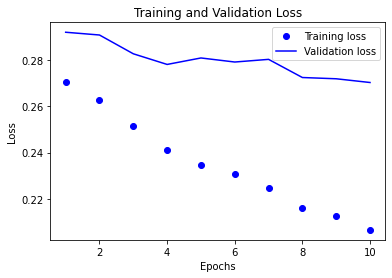

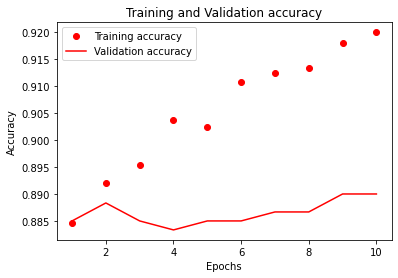

In [27]:
history_dict = history.history
history_dict.keys()

train_acc = history_dict['acc']
val_acc = history_dict['val_acc']
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(train_acc)+1)

# Plot loss plot 
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy plot 
plt.plot(epochs, train_acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
# Evaluating the model on test data
test_loss,test_acc = model.evaluate(test_generator)

print("Test loss for best validation model : ",test_loss)
print("Test accuracy for best validation model : ",test_acc)

50/50 [==============================] - 100s 2s/step - loss: 0.2626 - acc: 0.8810
Test loss for best validation model :  0.2625698149204254
Test accuracy for best validation model :  0.8809999823570251


#### Conclusion :- By unfreezing the 'block5_conv1' layer of convolution base and again training custom network and unfrozen layer, we have increased the test accuracy by approximately 1.9%

### (8). Modify the data generator to perform data augmentation. Retrain with frozen convolution base and evaluate the results

In [31]:
# Modifying the data generator to perform data augmentation
train_datagen_modify = ImageDataGenerator(
                        rescale = 1./255,
                        rotation_range = 40,
                        horizontal_flip = True,
                        fill_mode = 'nearest')

train_generator = train_datagen_modify.flow_from_directory(
                       train_directory,
                       target_size=(150,150),
                       batch_size=20,
                       class_mode='binary')

# Pre-trained convolution base of VGG16 on Imagenet dataset
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
conv_base.summary()

Found 2400 images belonging to 2 classes.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPoo

In [32]:
conv_base.trainable = False

model = models.Sequential()

# Adding pre-trained layers of VGG16
model.add(conv_base)

# Perform flattening
model.add(Flatten())


# First Fully Connected layer
model.add(Dense(256, activation='relu'))

# Second Fully Connected layer/ Output layer
model.add(Dense(1, activation='sigmoid'))

# Model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [33]:
# Compile the network
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=0.00001), metrics=['acc'])

# Train the model
history = model.fit(train_generator, steps_per_epoch=120, epochs=30,
                   validation_data=validation_generator, validation_steps=30)

Epoch 1/30
120/120 [==============================] - 311s 3s/step - loss: 0.6086 - acc: 0.6800 - val_loss: 0.4871 - val_acc: 0.8067
Epoch 2/30
120/120 [==============================] - 317s 3s/step - loss: 0.4623 - acc: 0.8196 - val_loss: 0.3979 - val_acc: 0.8433
Epoch 3/30
120/120 [==============================] - 317s 3s/step - loss: 0.4009 - acc: 0.8371 - val_loss: 0.3581 - val_acc: 0.8417
Epoch 4/30
120/120 [==============================] - 318s 3s/step - loss: 0.3625 - acc: 0.8521 - val_loss: 0.3287 - val_acc: 0.8767
Epoch 5/30
120/120 [==============================] - 319s 3s/step - loss: 0.3410 - acc: 0.8575 - val_loss: 0.3126 - val_acc: 0.8783
Epoch 6/30
120/120 [==============================] - 318s 3s/step - loss: 0.3244 - acc: 0.8604 - val_loss: 0.3010 - val_acc: 0.8750
Epoch 7/30
120/120 [==============================] - 319s 3s/step - loss: 0.3088 - acc: 0.8746 - val_loss: 0.2975 - val_acc: 0.8833
Epoch 8/30
120/120 [==============================] - 319s 3s/step - 

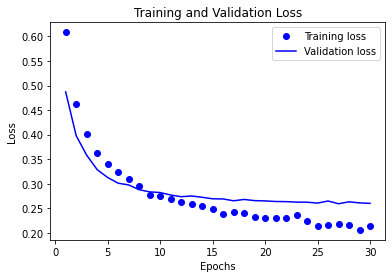

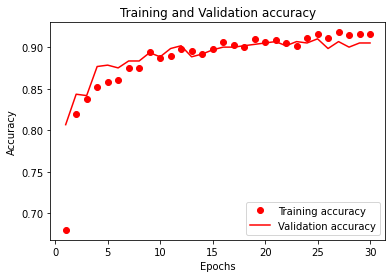

In [34]:
history_dict = history.history
history_dict.keys()

train_acc = history_dict['acc']
val_acc = history_dict['val_acc']
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(train_acc)+1)

# Plot loss plot 
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy plot 
plt.plot(epochs, train_acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
# Evaluating the model on test data
test_loss,test_acc = model.evaluate(test_generator)

print("Test loss for best validation model : ",test_loss)
print("Test accuracy for best validation model : ",test_acc)

50/50 [==============================] - 102s 2s/step - loss: 0.2454 - acc: 0.8930
Test loss for best validation model :  0.2454373985528946
Test accuracy for best validation model :  0.8930000066757202
